In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Script/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
data=pd.read_csv('./Data/Heart Attack.csv')
data.shape

(294, 14)

In [4]:
data.dtypes

age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
num             int64
dtype: object

# visualization of Correlation in Data

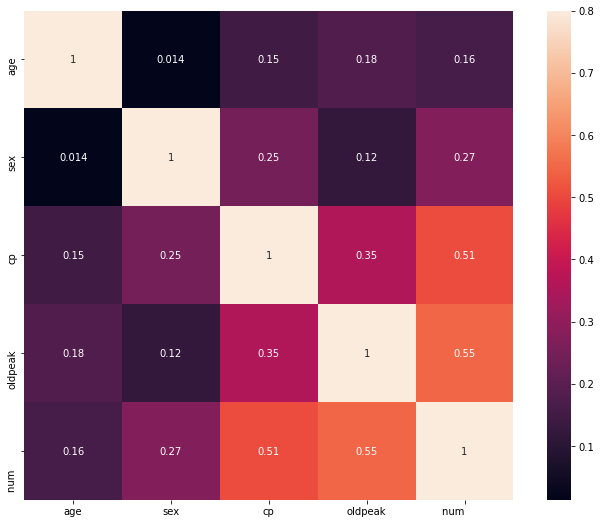

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [6]:
for col in data.columns:
    if 'num' in col:
        continue
    print(col, '\n------------\n') 
    print("Unknown % = {}".format(len(data[data[col] == '?'])/ len(data)))
    print("Median: {}".format(data[data[col] != '?'][col].median()))
    print("Mean: {}".format(data[data[col] != '?'][col].mean()))
temp = data.drop(['ca', 'thal', 'slope'], axis=1)
temp.head()

age 
------------

Unknown % = 0.0
Median: 49.0
Mean: 47.826530612244895
sex 
------------

Unknown % = 0.0
Median: 1.0
Mean: 0.7244897959183674
cp 
------------

Unknown % = 0.0
Median: 3.0
Mean: 2.9829931972789114
trestbps 
------------

Unknown % = 0.003401360544217687
Median: 130.0
Mean: inf
chol 
------------

Unknown % = 0.0782312925170068
Median: 243.0
Mean: inf
fbs 
------------

Unknown % = 0.027210884353741496
Median: 0.0
Mean: 3.496503496503496e+246
restecg 
------------

Unknown % = 0.003401360544217687
Median: 0.0
Mean: 6.829692833109283e+289
thalach 
------------

Unknown % = 0.003401360544217687
Median: 140.0
Mean: inf
exang 
------------

Unknown % = 0.003401360544217687
Median: 0.0
Mean: 3.4129692832764505e+257
oldpeak 
------------

Unknown % = 0.0
Median: 0.0
Mean: 0.5860544217687075
slope 
------------

Unknown % = 0.6462585034013606
Median: 2.0
Mean: 2.0405973184828e+101
ca 
------------

Unknown % = 0.9897959183673469
Median: 0.0
Mean: 0.0
thal 
------------

Unkn

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [7]:
for col in temp.columns:
    print(col, '\n----------------\n',temp[temp[col] == '?'], '\n-----------------------\n')
# print(temp[temp != '?'])

age 
----------------
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num       ]
Index: [] 
-----------------------

sex 
----------------
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num       ]
Index: [] 
-----------------------

cp 
----------------
 Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, num       ]
Index: [] 
-----------------------

trestbps 
----------------
     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
90   48    0   2        ?  308   0       1       ?     ?      2.0           0 
-----------------------

chol 
----------------
      age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
2     29    1   2      140    ?   0       0     170     0      0.0           0
31    39    1   2      120    ?   0       1     146     0      2.0           0
34    39    1   2      130    ? 

# Preprocessing the Data

In [8]:
data.rename(columns={'num       ': 'target'}, inplace=True) 
data.drop(['ca', 'thal', 'slope'], axis=1, inplace=True)
#Deleting outliers for now
data.drop(index=[2, 31, 34, 44, 65, 72, 75, 86, 91, 97, 101, 102, 108, 124, 134, 154, 168, 182, 226, 239, 244, 275, 278, 27, 81, 107, 131, 144, 166, 197, 199, 260, 90] , inplace=True)

# for col in data.columns:
#     data.drop(index=data[data[col] == '?'], inplace=True)
# data['chol']=data['chol'].replace('?', data[data['chol'] != '?']['chol'].median())
# data=data.replace('?',None)
# data=data.replace('?',0)

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [9]:
#Scaling the other attributes using normal scaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])
scaling_values = {}
computed_scaling_values = [standardScaler.mean_, np.sqrt(standardScaler.var_)]
for idx, col in enumerate(columns_to_scale):
    scaling_values[col] = {'mean': computed_scaling_values[0][idx], 'std': computed_scaling_values[1][idx]}
scaling_values

{'age': {'mean': 47.78544061302682, 'std': 7.837424872831495},
 'trestbps': {'mean': 132.65900383141764, 'std': 17.68115339039127},
 'chol': {'mean': 249.34099616858236, 'std': 65.37151861285574},
 'thalach': {'mean': 139.17241379310346, 'std': 23.703245277858866},
 'oldpeak': {'mean': 0.6045977011494253, 'std': 0.9268958675421668}}

# Final Preprocessed Data

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,-2.524482,1,2,-0.150386,-1.794987,0,2,1.933389,0,-0.652282,0
1,-2.396889,1,2,-0.715960,-0.096999,0,0,0.878681,0,-0.652282,0
3,-2.269296,0,1,2.111910,-0.188782,0,1,1.300564,0,-0.652282,0
4,-2.141704,0,2,-1.847108,-0.464132,0,1,0.456798,0,-0.652282,0
5,-2.014111,0,2,-1.564321,-0.785373,0,0,1.089622,0,-0.652282,0


# Splitting data as Train and Test

In [11]:
y = data['target']
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#80% Train and 20% Test Data

c:\users\srinivas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


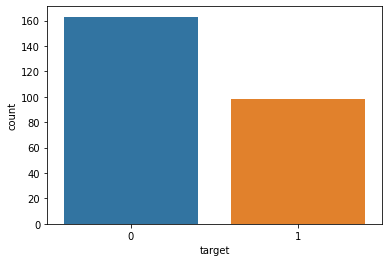

In [12]:
#Plotting the Target (Heart Disease)
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()

In [13]:
#Analysing the shape of X_train and X_test Data

print(X_train.shape)
print(X_test.shape)

(208, 10)
(53, 10)


In [38]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Surface contours using plotly

In [40]:
iplot([go.Histogram2dContour(x=data.head(500)['age'], 
                             y=data.head(500)['fbs'], 
                             contours=go.Contours(coloring='heatmap')),
       go.Scatter(x=data.head(1000)['age'], y=data.head(1000)['fbs'], mode='markers')])

c:\users\srinivas\appdata\local\programs\python\python38\lib\site-packages\plotly\graph_objs\_deprecations.py:204: DeprecationWarning:

plotly.graph_objs.Contours is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.contour.Contours
  - plotly.graph_objs.surface.Contours
  - etc.




3D plots using plotly

In [41]:
data = data.assign(n=0).groupby(['fbs', 'age'])['n'].count().reset_index()
data = data[data["age"] < 100]
v = data.pivot(index='age', columns='fbs', values='n').fillna(0).values.tolist()

In [42]:
iplot([go.Surface(z=v)])

Bar chart using Seaborn

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'age')

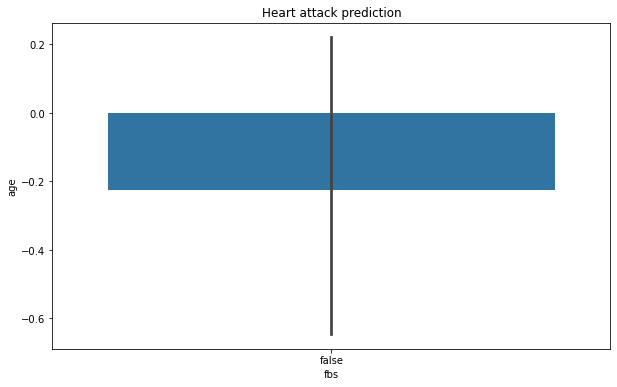

In [45]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Heart attack prediction")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=data['fbs'], y=data['age'])

# Add label for vertical axis
plt.ylabel("age")

Line plot using Seaborn

<AxesSubplot:ylabel='target'>

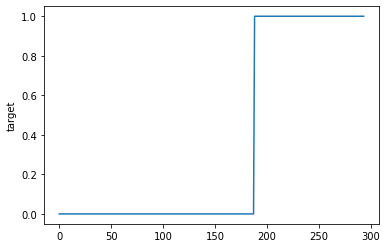

In [46]:
sns.lineplot(data=y)

Scatterplot using seaborn

<AxesSubplot:xlabel='age', ylabel='fbs'>

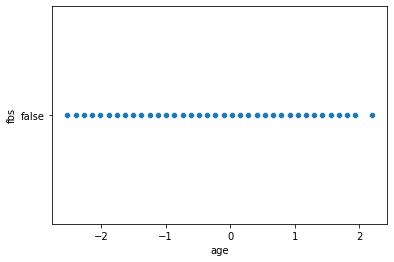

In [48]:
sns.scatterplot(data=data, x="age", y="fbs")

Pie charts

<AxesSubplot:ylabel='fbs'>

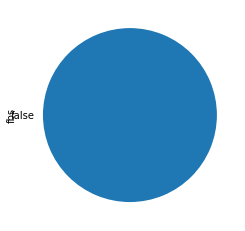

In [49]:
data['fbs'].value_counts().head(10).plot.pie()

# Data Cleaning

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fbs     37 non-null     object 
 1   age     37 non-null     float64
 2   n       37 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ KB


In [56]:
data.shape

(37, 3)

In [58]:
data.isnull().sum()

fbs    0
age    0
n      0
dtype: int64

In [59]:
data.skew()

age    0.015586
n      0.932088
dtype: float64

In [61]:
data.duplicated().sum()

0